# GETTING ACQUAINTED WITH PYTHON DATAFRAMES

In [14]:
#import package/modules and assign an identifier for easier usage

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
#Create a sample of Array
sample_array=[0.5, 0.3, 0.2, 0.4, 0.7]

In [16]:
#how an array looks like
print(sample_array)

[0.5, 0.3, 0.2, 0.4, 0.7]


In [17]:
#Convert Array to Series
sample_series=pd.Series(sample_array)

In [18]:
#how a series looks like
print(sample_series)

0    0.5
1    0.3
2    0.2
3    0.4
4    0.7
dtype: float64


In [19]:
#create index for a Series based on other Series. 

#create a list of index in array
ind=['A','B','A','B','B']

#set index of a series from the list
sample_series.index=ind

In [20]:
#alternative to print. note that if multiple item to print in the same cell, only the last line will be displayed.
sample_series

A    0.5
B    0.3
A    0.2
B    0.4
B    0.7
dtype: float64

In [21]:
#define new array. Use None for invalid/unavailable data
name=['Ahmad','Ain','Siti','Nurul','Ali']
quiz1=['0.7','0.8','0.9',None,'0.7']

In [22]:
#create a tuple to join two list
joined_name_quiz=list(zip(name, quiz1))

In [23]:
joined_name_quiz

[('Ahmad', '0.7'),
 ('Ain', '0.8'),
 ('Siti', '0.9'),
 ('Nurul', None),
 ('Ali', '0.7')]

In [24]:
#convert our tuple to a dataframe and set the column name
data_student=pd.DataFrame(joined_name_quiz, index=ind, columns=['Name','Quiz1'])
data_student

,Name,Quiz1
A,Ahmad,0.7
B,Ain,0.8
A,Siti,0.9
B,Nurul,None
B,Ali,0.7


In [25]:
#concat the dataframe with series created previously.
#default concat append by row, axis=1. to append by column, set axis=1.
data=pd.concat([data_student, sample_series], axis=1)

In [26]:
data

,Name,Quiz1,0
A,Ahmad,0.7,0.5
B,Ain,0.8,0.3
A,Siti,0.9,0.2
B,Nurul,None,0.4
B,Ali,0.7,0.7


In [27]:
#change name to be the new index. Reset if require the previous index to be a new column. Else, the previous index will be discarded.

#reset index
data.reset_index(inplace=True)

#set column as new index
data.set_index('Name', inplace=True)

In [28]:
data

,index,Quiz1,0
Name,,,
Ahmad,A,0.7,0.5
Ain,B,0.8,0.3
Siti,A,0.9,0.2
Nurul,B,None,0.4
Ali,B,0.7,0.7


In [29]:
#rename column using rename()
data=data.rename(columns={0: 'Quiz2', 'index':'Class'})

In [30]:
data

,Class,Quiz1,Quiz2
Name,,,
Ahmad,A,0.7,0.5
Ain,B,0.8,0.3
Siti,A,0.9,0.2
Nurul,B,None,0.4
Ali,B,0.7,0.7


In [31]:
#select data from series by index value
print("Details for Ahmad:\n%s "%data.loc['Ahmad'])

Details for Ahmad:
Class      A
Quiz1    0.7
Quiz2    0.5
Name: Ahmad, dtype: object 


In [32]:
#select data from series row position
print("Details for second row:\n%s "%data.iloc[1])

Details for second row:
Class      B
Quiz1    0.8
Quiz2    0.3
Name: Ain, dtype: object 


In [33]:
#check total missing value by column
data.isna().sum()

Class    0
Quiz1    1
Quiz2    0
dtype: int64

In [34]:
#check total missing value by row. T is transform
data.T.isna().sum()

Name
Ahmad    0
Ain      0
Siti     0
Nurul    1
Ali      0
dtype: int64

In [35]:
#let's check from dataframe of any missing data
data[data.isna().any(1)]

,Class,Quiz1,Quiz2
Name,,,
Nurul,B,None,0.4


In [36]:
#assign new value to the missing data
data=data.fillna(0.7)

In [37]:
#check data type of every column
data.dtypes

Class     object
Quiz1     object
Quiz2    float64
dtype: object

In [38]:
#change data type of a specific column.
data['Quiz1']=data['Quiz1'].astype('float')
data.dtypes

Class     object
Quiz1    float64
Quiz2    float64
dtype: object

In [39]:
#let's create new column based on existing columns
data['AverageQuiz']=(data['Quiz1'] + data['Quiz2'])/2

In [40]:
data

,Class,Quiz1,Quiz2,AverageQuiz
Name,,,,
Ahmad,A,0.7,0.5,0.60
Ain,B,0.8,0.3,0.55
Siti,A,0.9,0.2,0.55
Nurul,B,0.7,0.4,0.55
Ali,B,0.7,0.7,0.70


In [41]:
#try on lambda that applies modification to each row of data

#add bonus mark of 0.1 to AverageQuiz of every student
data['AfterBonus']=(data.AverageQuiz.apply(lambda x: x+0.1))

In [42]:
data

,Class,Quiz1,Quiz2,AverageQuiz,AfterBonus
Name,,,,,
Ahmad,A,0.7,0.5,0.60,0.70
Ain,B,0.8,0.3,0.55,0.65
Siti,A,0.9,0.2,0.55,0.65
Nurul,B,0.7,0.4,0.55,0.65
Ali,B,0.7,0.7,0.70,0.80


In [43]:
#Perform statistical calculation.
#calculate mean of all student's average mark
print(data.AverageQuiz.mean())

0.5900000000000001


In [44]:
#statistical calculation can be derived based on describe()
data.describe()

,Quiz1,Quiz2,AverageQuiz,AfterBonus
count,5.000000,5.000000,5.000000,5.000000
mean,0.760000,0.420000,0.590000,0.690000
std,0.089443,0.192354,0.065192,0.065192
min,0.700000,0.200000,0.550000,0.650000
25%,0.700000,0.300000,0.550000,0.650000
50%,0.700000,0.400000,0.550000,0.650000
75%,0.800000,0.500000,0.600000,0.700000
max,0.900000,0.700000,0.700000,0.800000


In [45]:
data

,Class,Quiz1,Quiz2,AverageQuiz,AfterBonus
Name,,,,,
Ahmad,A,0.7,0.5,0.60,0.70
Ain,B,0.8,0.3,0.55,0.65
Siti,A,0.9,0.2,0.55,0.65
Nurul,B,0.7,0.4,0.55,0.65
Ali,B,0.7,0.7,0.70,0.80


In [46]:
#get the size of each group in a column
data.groupby('Class').size()

Class
A    2
B    3
dtype: int64

In [47]:
#alternative way of getting size of each group in a column
data['Class'].value_counts()

B    3
A    2
Name: Class, dtype: int64

In [48]:
#replace class name with new name
data.replace({'Class':{'A':'Alpha', 'B':'Beta'}}, inplace=True)

In [49]:
data

,Class,Quiz1,Quiz2,AverageQuiz,AfterBonus
Name,,,,,
Ahmad,Alpha,0.7,0.5,0.60,0.70
Ain,Beta,0.8,0.3,0.55,0.65
Siti,Alpha,0.9,0.2,0.55,0.65
Nurul,Beta,0.7,0.4,0.55,0.65
Ali,Beta,0.7,0.7,0.70,0.80


### VISUALIZATION

In [50]:
import matplotlib.pyplot as plt

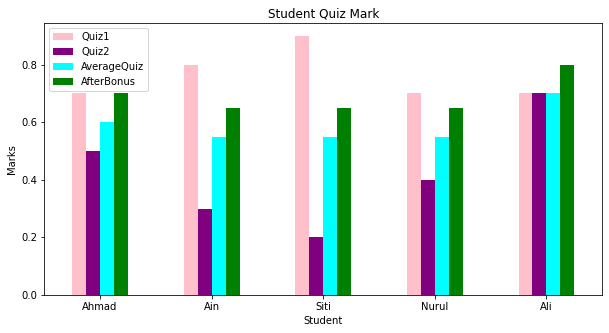

In [51]:
#simplest way to plot a bar chart
data.plot(kind='bar', color=["pink","purple","cyan","green"],title="Student Quiz Mark", figsize=(10,5), ylabel='Marks', xlabel='Student')

#semicolon at the end of this line helps to remove printing the details from dataset
plt.xticks(rotation=360);

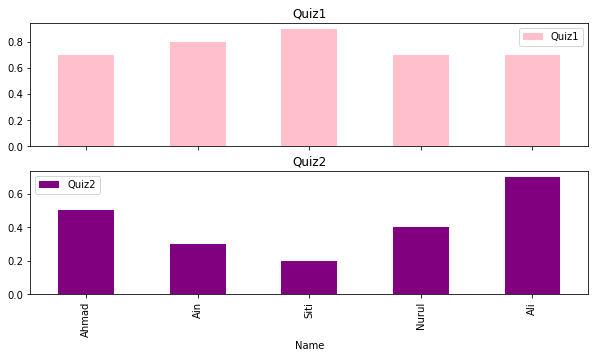

In [52]:
#Select column and display in subplots
data[["Quiz1","Quiz2"]].plot(kind='bar', color=["pink","purple"],figsize=(10,5), subplots=True);

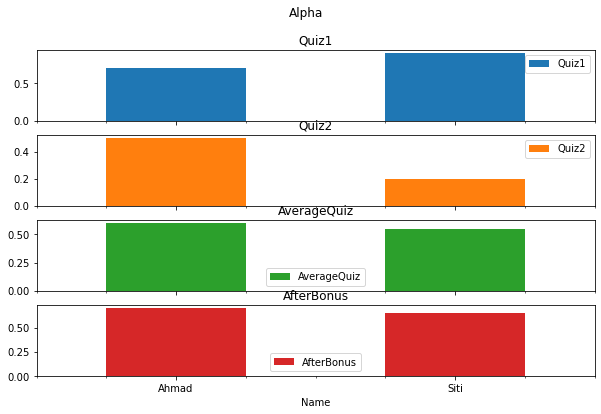

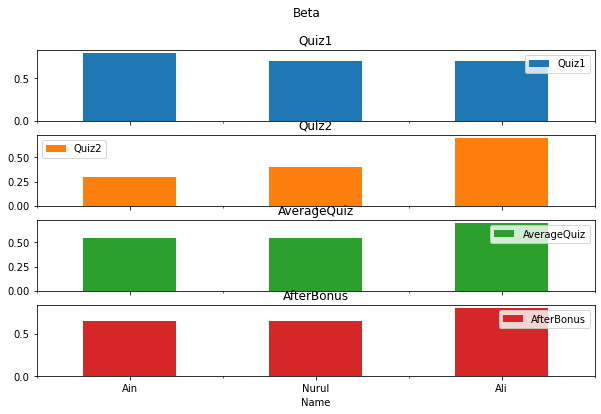

In [53]:
#By class, display mark of every students and display in subplots
#Group the data by class and retrieve the classroom and mark then plot mark by classroom
for classroom, mark in data.groupby('Class'):
    mark.plot(kind='bar',figsize=(10,6), title=classroom, subplots=True);
    plt.xticks(rotation=360);

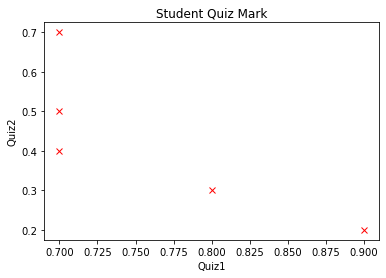

In [54]:
#Scatter Plot with Two Specific Columns
plt.plot(data.Quiz1, data.Quiz2, ls='', marker='x', color='red')
plt.title('Student Quiz Mark')
plt.xlabel('Quiz1')
plt.ylabel('Quiz2');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


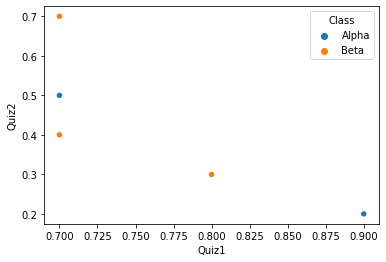

In [55]:
#alternative scatterplot
sns.scatterplot(data.Quiz1,data.Quiz2, hue=data.Class)
plt.show();

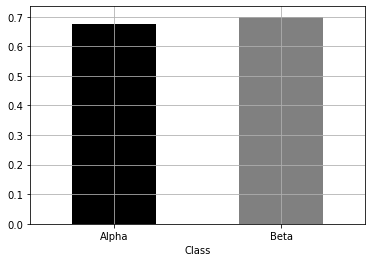

In [56]:
#incorporating statistical calculation in plot. 
#By class, plot mean mark afterbonus
data.groupby('Class').AfterBonus.mean().plot(kind='bar', color=["black","grey"])
plt.grid()
plt.xticks(rotation=360);

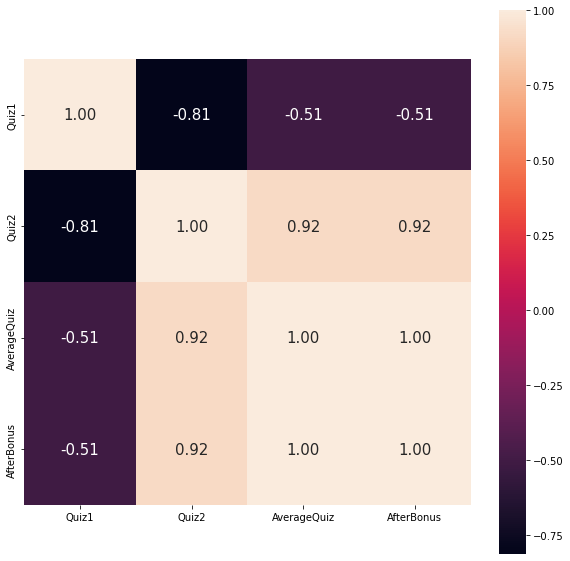

In [57]:
#plot coefficient correlation for numerical data
corr=data.corr()
plt.figure(figsize=(10,10))
hm = sns.heatmap(corr,cbar=True,annot=True,square=True, fmt='.2f', annot_kws={'size': 15})
plt.show()

In [58]:
#Let's write our dataframe to a csv file and store them in folder named data.
#ensure index=True to keep the index or else we will loose the index
data.to_csv("data\\student_mark.csv", index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\student_mark.csv'

In [ ]:
#let's retrieve again our saved csv file. This can be useful in reading dataset from the beginning.
#we can automatically set the first column as index by using index_col
my_saved_data=pd.read_csv("data\\student_mark.csv", index_col=0)

In [ ]:
my_saved_data

,Class,Quiz1,Quiz2,AverageQuiz,AfterBonus
Name,,,,,
Ahmad,Alpha,0.7,0.5,0.60,0.70
Ain,Beta,0.8,0.3,0.55,0.65
Siti,Alpha,0.9,0.2,0.55,0.65
Nurul,Beta,0.7,0.4,0.55,0.65
Ali,Beta,0.7,0.7,0.70,0.80
